# <center>📈📈📈 TP 3: Linear regression 📈📈📈</center>

*******
####   <center><font color='green'> préparer par Hajer Mhimdi </center>

***



#### There are many ways to find the coefficients and the intercept, you can use least squares or one of the optimisation methods like gradient decent

# <center><font color='red'>Exemple 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
HajerMhimdi= pd.read_csv('grav.csv')
print('shape:',HajerMhimdi.shape)
HajerMhimdi.head()

shape: (7, 2)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


Text(0, 0.5, 'Seconds Squared')

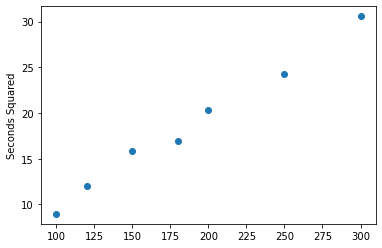

In [3]:
x= HajerMhimdi['height']
y= HajerMhimdi['seconds squared']
plt.scatter(x,y)
plt.ylabel("Seconds Squared")

In [4]:
np.corrcoef(x,y)

array([[1.        , 0.99473243],
       [0.99473243, 1.        ]])

### X-Y Plots With a Regression Line


Now you have all the values you need. You can also get the string with the equation of the regression line and the value of the correlation coefficient. f-strings are very convenient for this purpose:

In [5]:
import numpy as np
import scipy.stats

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-0.68+0.10x, r=0.99'

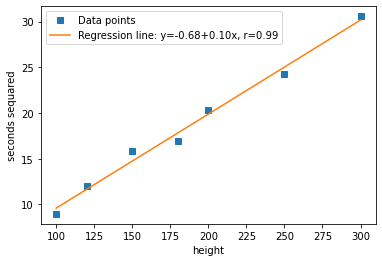

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('height')
ax.set_ylabel('seconds sequared')
ax.legend(facecolor='white')
plt.show()

#### Lets start with a simple example with 2 dimensions only. We want to find the equation:
## <center> y = mx + b

In [7]:
### calculer slope(m)

In [8]:
from scipy import stats
stats.linregress(x,y)

LinregressResult(slope=0.10280912511759172, intercept=-0.6801232361241745, rvalue=0.9947324344135698, pvalue=3.857021649169523e-06, stderr=0.004737919558962453)

In [9]:
#Compute the slope (m):


m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
print('slope:', m)

slope: 0.10280912511759173


In [10]:
#Compute the bias (b)


b = (np.sum(y) - m *np.sum(x)) / len(x)
print('intercept:',b)

intercept: -0.6801232361241765


##### we can now write our predict function:


In [11]:

def predict(x):
    return 0.1*x - 0.68


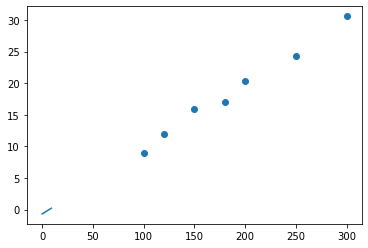

In [12]:
vec = np.arange(10)
plt.scatter(x,y)
plt.plot(vec,predict(vec))

##### lets write now a function to generate linear regression model based on 2 vectors

In [13]:
def getlinear(x,y):
 
    def inner(x1):
        return m * x1 + b
    m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) * np.sum(x))
    b = (np.sum(y) - m *np.sum(x)) / len(x)
    return inner

##### Now if we have 2 vectors X,Y and we want to create a linear model we use it:


In [14]:
predict = getlinear(x,y)

In [15]:
x1 = predict(4)
print(x1)

-0.26888673565380955


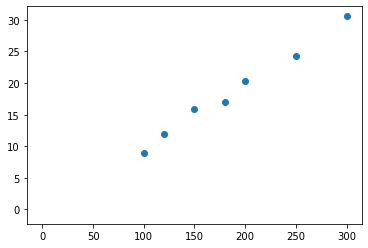

In [16]:
#draw graph
plt.scatter(x,y)
plt.plot(x1,predict(x1))

# <center><font color='red'>Exemple2

In [17]:
HajerMhimdi_testScr= pd.read_csv('test_scores.csv')
print('shape:',HajerMhimdi_testScr.shape)
HajerMhimdi_testScr

shape: (2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,1.0,1.0,ZBH,0.0,30.0,T8LSK,1.0,2.0,39.0,55.0
2129,ZOWMK,1.0,1.0,ZBH,0.0,30.0,VNP26,1.0,1.0,38.0,46.0
2130,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YDR1Z,1.0,1.0,45.0,51.0
2131,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YUEIH,0.0,1.0,46.0,53.0


In [18]:
pretest = HajerMhimdi_testScr['pretest'].iloc[0:10]
pretest

0    62.0
1    66.0
2    64.0
3    61.0
4    64.0
5    66.0
6    63.0
7    63.0
8    64.0
9    61.0
Name: pretest, dtype: float64

In [19]:
posttest = HajerMhimdi_testScr['posttest'].iloc[0:10]
posttest

0    72.0
1    79.0
2    76.0
3    77.0
4    76.0
5    74.0
6    75.0
7    72.0
8    77.0
9    72.0
Name: posttest, dtype: float64

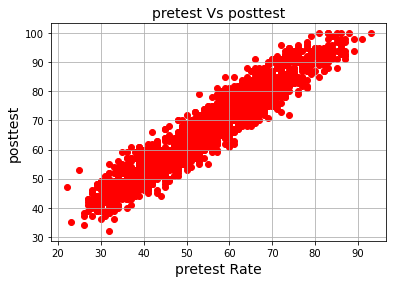

In [20]:
plt.scatter(HajerMhimdi_testScr['pretest'], HajerMhimdi_testScr['posttest'], color='red')
plt.title('pretest Vs posttest', fontsize=14)
plt.xlabel('pretest Rate', fontsize=14)
plt.ylabel('posttest', fontsize=14)
plt.grid(True)

plt.show()

In [21]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg



X = HajerMhimdi_testScr[['pretest']] 
Y = HajerMhimdi_testScr['posttest']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(HajerMhimdi_testScr[['pretest']].astype(float),HajerMhimdi_testScr['posttest'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['posttest']) 
ax3.set_xlabel('pretest')
ax3.set_title('pretest Vs. posttest')

root.mainloop()

Intercept: 
 13.213064144516018
Coefficients: 
 [0.98058824]


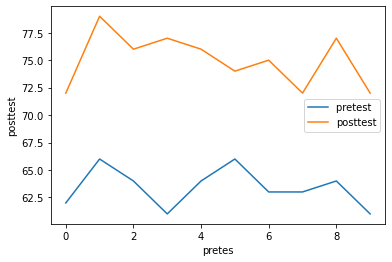

In [22]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = pretest.plot(x='pretestT', y='pretest', label='pretest ') 
posttest.plot(x='posttest', y='postest', label='posttest', ax=ax)
ax.set_xlabel('pretes')
ax.set_ylabel('posttest')
ax.legend(facecolor='white')
plt.show()

In [23]:
HajerMhimdi_testScr

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,1.0,1.0,ZBH,0.0,30.0,T8LSK,1.0,2.0,39.0,55.0
2129,ZOWMK,1.0,1.0,ZBH,0.0,30.0,VNP26,1.0,1.0,38.0,46.0
2130,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YDR1Z,1.0,1.0,45.0,51.0
2131,ZOWMK,1.0,1.0,ZBH,0.0,30.0,YUEIH,0.0,1.0,46.0,53.0


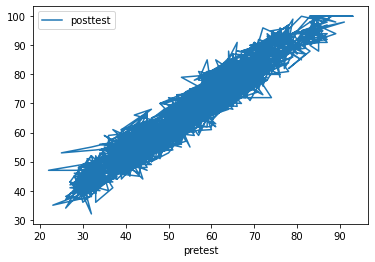

In [24]:
# Plot score_success >1 
HajerMhimdi_testScr["score_success"] = HajerMhimdi_testScr['posttest'] / HajerMhimdi_testScr['pretest']
ax = HajerMhimdi_testScr.plot(x='pretest', y='posttest')

### 3D Visualization of Multiple Linear Regression 📈📈


In [25]:
##Fit the algorithm
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()

In [26]:
Regressor.fit(X,Y)

LinearRegression()

In [27]:
## Prepare the data for Visualization

onlyX = pd.DataFrame(X,Y)
fittedY=Regressor.predict(onlyX)

In [28]:
## convert the predicted result in an array
fittedY=np.array(fittedY)
fittedY

array([76.9512998 , 76.9512998 , 76.9512998 , ..., 74.99012332,
       71.06777035, 70.08718211])

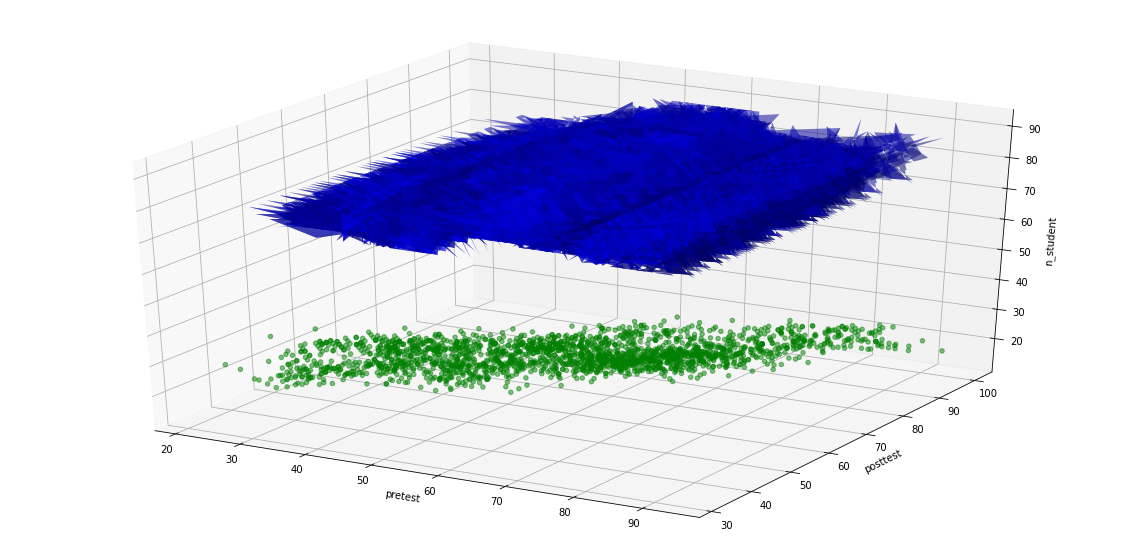

In [29]:
# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(HajerMhimdi_testScr['pretest'],HajerMhimdi_testScr['posttest'],HajerMhimdi_testScr['n_student'],c='green', marker='o', alpha=0.5)
ax.plot_surface(X,Y,fittedY.reshape(X.shape), color='b', alpha=0.3)
ax.set_xlabel('pretest')
ax.set_ylabel('posttest')
ax.set_zlabel('n_student')
plt.show()

## How to Calculate Correlation between Analysis of pretest and final exam results

### Covariance


The calculation of the sample covariance is as follows:
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.

In [30]:
from numpy import cov
covariance = cov(HajerMhimdi_testScr['posttest'], HajerMhimdi_testScr['pretest'])
covariance

array([[195.6302625 , 180.38677633],
       [180.38677633, 183.95771927]])

### Pearson’s Correlation


The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

In [31]:
from scipy.stats import pearsonr

data1 = HajerMhimdi_testScr['posttest']
data2 = HajerMhimdi_testScr['pretest']
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.6f' % corr)

Pearsons correlation: 0.950884


### Spearman’s Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

In [32]:
from scipy.stats import spearmanr

data1 = HajerMhimdi_testScr['posttest']
data2 = HajerMhimdi_testScr['pretest']
# calculate Pearson's correlation
corr, _ = spearmanr(data1, data2)
print('Pearsons correlation: %.6f' % corr)

Pearsons correlation: 0.952461


## Visualization of Correlation


 is very important in statistics and data science. It can help you better understand your data and give you a better insight into the relationships between features. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix.

In [33]:
import numpy as np
import scipy.stats

slope, intercept, r, p, stderr = scipy.stats.linregress(data1, data2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [34]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-6.92+0.92x, r=0.95'

The blue squares represent the observations, while the orange line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.

In [35]:
corr_matrix = np.corrcoef(data1).round(decimals=2)
data1

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64

# <center><font color='red'>Exemple3

First, we need to load in our dataset. We're using the Scikit-Learn library, and it comes prepackaged with some sample datasets. The dataset we'll be using is the Boston Housing Dataset. The dataset has many different features about homes in the Boston area, like house size, crime rate, building age, etc. The goal is to predict the price of the house based on these features.

Here are all the imports we need:

#### 1. Import the data and specify the variable types with the Type node.

In [51]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [52]:

from sklearn.datasets import load_boston
bh_data = load_boston()

In [53]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [54]:
# We print the value of the boston_dataset to understand what it contains. 
print(bh_data.keys()) 


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


* data: contains the information for various houses
* target: prices of the house
* feature_names: names of the features
* DESCR: describes the dataset

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.
We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [55]:
boston = pd.DataFrame(bh_data.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 2. Add a Regression node to the stream and select MEDV as the target variable and all other variables as the input.

#### We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [56]:
boston['MEDV'] = bh_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [57]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.
Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

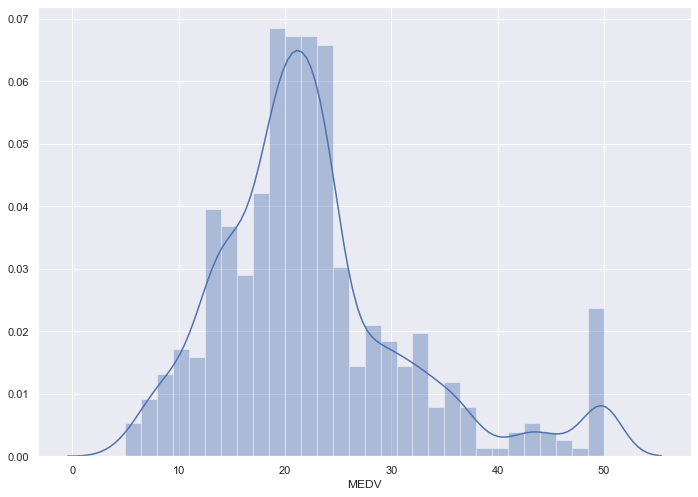

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

#### We see that the values of MEDV are distributed normally with few outliers.


## 3. Choose the Backwards method to find the significant input variables and then run the stream.

##### Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

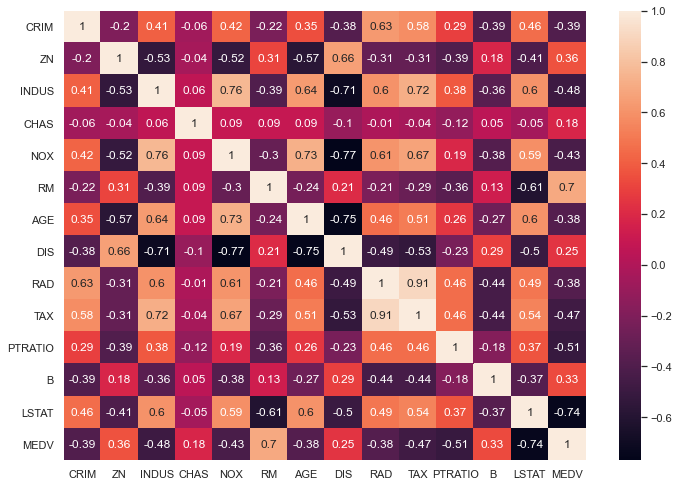

In [59]:

correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

* To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
* An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
** Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

## 4. Inspect the model nugget and identify the estimated coefficients and the regression equation. Which variables are included in the final model, and which variable has a coefficient of 3.832?


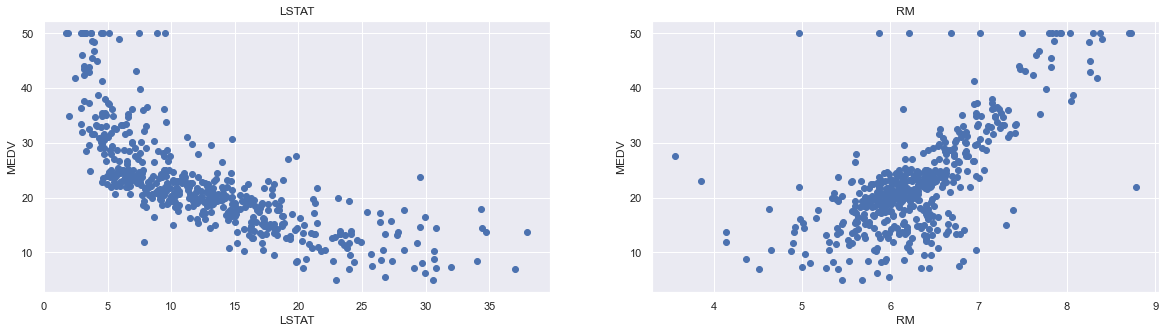

In [60]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

* The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
* The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Preparing the data for training the model


In [61]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Splitting the data into training and testing sets
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library

In [62]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

Now that the model has been fit we can make predictions by calling the predict command. We are making predictions on the testing set:

### Model evaluation
We will evaluate our model using RMSE and R2-score.

In [66]:
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


### le modèle LinearRegression testé


In [67]:
from sklearn.linear_model import LinearRegression

print(LinearRegression().get_params())


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [68]:
from sklearn.pipeline import Pipeline
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []

# ajouter LinearRegression
pipelines.append(Pipeline([('clf', LinearRegression())])) ### LinearRegression
params.append({'clf__normalize':[True]})
names.append('LinearRegression')


In [ ]:
#Visualization

In [69]:

##Fit the algorithm
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()


In [80]:
x=boston[['LSTAT']]
y=boston['MEDV']
Regressor.fit(x,y)
## Prepare the data for Visualization


LinearRegression()

## Conclusion
as a conclusion we applied the concepts of linear regression on the Boston housing dataset. I would recommend to try out other datasets as well.